# Lecture 5: Supervised Models, [Logit](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

* How to train a logit model with `sklearn`.

## Imports

In [1]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set()

## Data

We use the well-known [Iris](https://scikit-learn.org/stable/datasets/index.html#iris-plants-dataset) data set with three classes:

    Iris-Setosa            Iris-Versicolour           Iris-Virginica
  
  
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/f/f8/Iris_virginica_2.jpg/1280px-Iris_virginica_2.jpg" alt="Advanced" style="width: 200px; display: inline; margin-top: 0"/>
<img src="https://upload.wikimedia.org/wikipedia/commons/2/27/Blue_Flag%2C_Ottawa.jpg" alt="Advanced" style="width: 200px; display: inline; margin-top: 0"/>
<img src="https://upload.wikimedia.org/wikipedia/commons/5/56/Kosaciec_szczecinkowaty_Iris_setosa.jpg" alt="Advanced" style="height: 200px; display: inline; margin-top: 0"/>

In [2]:
from sklearn.datasets import load_iris

X, y = load_iris(return_X_y=True)

## Logit

We begin with a binary [logit model](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html). Because the outcome for logit needs to be binary, we first have to convert our 3-class regressand into a binary outcome. We can easily do that with a bitmask:

In [3]:
y_bin = y > 0

y_bin

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

### Steps 1-4
We follow the `sklearn` training process as seen on the slides.

In [4]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X, y_bin)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

We use the fitted model to predict values in the training data:

In [5]:
y_bin_fit = model.predict(X)
y_bin_fit

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

All Iris-Setosa and non-Iris-Setosa were predicted correctly:

In [6]:
(y_bin != y_bin_fit).sum()

0

## Multinomial Logit

Rather than to the regressors (like in MNB), the multinomial distribution now refers to the regressand. It allows us to predict categorical (multi-class) membership. Thus, we can use `y` directly.

### Steps 1-4
We follow the `sklearn` training process as seen on the slides.

In [7]:
model = LogisticRegression(max_iter=10000)
model.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

The default value for `multi_class` is `'auto'`, which means that `LogisticRegression` automatically adjusts for single or multi-class regressands.

We use the fitted model to predict values in the training data:

In [8]:
y_fit = model.predict(X)
y_fit

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

All but 4 have not been classified correctly:

In [9]:
(y != y_fit).sum()

4

Let's have a look at the confusion matrix again:

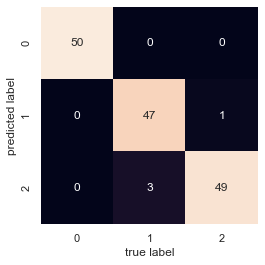

In [11]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y, y_fit)
sns.heatmap(cm.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

Additional assumptions:
* Independence of irrelevant alternatives: an observation's belonging to class A rather than B does not change if we add class C. Can be relaxed with nested logit or multinomial probit.

© 2023 Philipp Cornelius